<a href="https://colab.research.google.com/github/royg27/Machine-Learning/blob/master/HW4_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load the data set and normalize it:

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
from keras.utils import np_utils
from matplotlib import pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = (X_train / 255.0) - 0.5
X_test = (X_test / 255.0) - 0.5

# from categorical to 1-bit-hot
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
X_train.shape

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

plot images from train set to better understand the dataset:

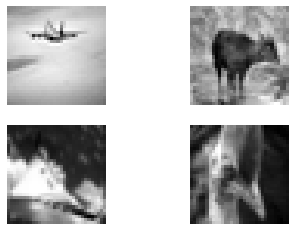

In [10]:
# Plot some images
from skimage import color
from skimage import io
i,j = 0,0
n_rows,n_cols = 2,2
fig, ax_arr = plt.subplots(n_rows,n_cols)
for idx in np.random.choice(X_train.shape[0],n_rows*n_cols):  #run n_rows*n_cols times, each time on image from 50,000 in train set
# color.rgb2gray(io.imread('image.png'))
  ax_arr[i,j].imshow(color.rgb2gray(X_train[idx,:,:,:]),cmap="gray")
  ax_arr[i,j].axis('off')
  j += 1
  if j==n_cols:
    i+= 1
    j=0
plt.show()

linear classifier

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=y_train.shape[1], activation='softmax',use_bias=True))
sgd=keras.optimizers.SGD(lr=0.1, decay=0.00004)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
epochs = 50
model1=model.fit(X_train.reshape(-1,32*32*3), y_train, validation_data=(X_test.reshape(-1,32*32*3), y_test), epochs=epochs, batch_size=128)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





50000/50000 [==============================] - 12s 234us/step - loss: 1.8312 - acc: 0.3646 - val_loss: 1.7615 - val_acc: 0.3863
Epoch 2/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.7453 - acc: 0.3981 - val_loss: 1.7414 - val_acc: 0.3984
Epoch 3/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.7219 - acc: 0.4095 - val_loss: 1.7442 - val_acc: 0.3928
Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.7056 - acc: 0.4148 - val_loss: 1.7363 - val_acc: 0.3963
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.6961 - acc: 0.4204 - val_loss: 1.7259 - val_acc: 0.4034
Epoch 6/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.6893 - acc: 0.4219 - val_loss: 1.7216 - val_acc: 0.4029
Epoch 7/50
50000/50

plot accuracy vs num_epochs:

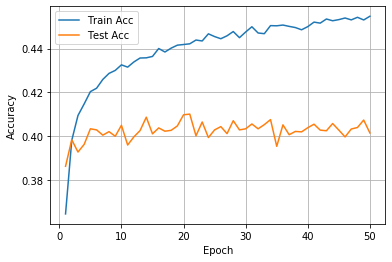

In [0]:
plt.figure()
plt.plot(range(1,len(model1.history['acc'])+1),model1.history['acc'], label='Train Acc')
plt.plot(range(1,len(model1.history['acc'])+1),model1.history['val_acc'], label='Test Acc')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.grid()
plt.show()

plot the rows of the linear classifier:

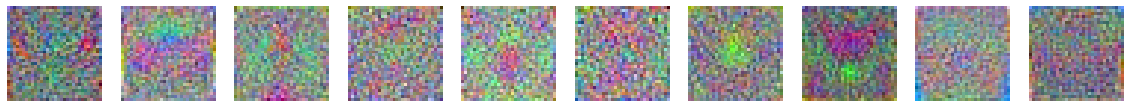

In [0]:
num_classes=y_train.shape[1]
fig, ax_arr = plt.subplots(1,num_classes)
W = model.layers[0].get_weights()[0]  #get the weights of layer 0. get_weights()[1] is the bias
for idx in range(num_classes):
  W_i = W[:,idx]
  # normalize
  W_i = W_i - np.mean(W_i)
  # move to [0,1]
  W_i = (W_i - np.min(W_i))/(np.max(W_i)- np.min(W_i))
  # reshape to RGB shape
  W_i = W_i.reshape(32,32,3)
  ax_arr[idx].imshow(W_i)
  ax_arr[idx].axis('off')
fig.set_size_inches(20,20)
plt.show()

re-do prevoius parts with regularization:

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 40us/step - loss: 2.1337 - acc: 0.3383 - val_loss: 2.0091 - val_acc: 0.3294
Epoch 2/200
50000/50000 [==============================] - 2s 37us/step - loss: 1.9946 - acc: 0.3480 - val_loss: 1.9825 - val_acc: 0.3487
Epoch 3/200
50000/50000 [==============================] - 2s 37us/step - loss: 1.9934 - acc: 0.3470 - val_loss: 1.9953 - val_acc: 0.3406
Epoch 4/200
50000/50000 [==============================] - 2s 37us/step - loss: 1.9944 - acc: 0.3461 - val_loss: 1.9796 - val_acc: 0.3587
Epoch 5/200
50000/50000 [==============================] - 2s 39us/step - loss: 1.9919 - acc: 0.3478 - val_loss: 1.9922 - val_acc: 0.3445
Epoch 6/200
50000/50000 [==============================] - 2s 36us/step - loss: 1.9929 - acc: 0.3482 - val_loss: 1.9926 - val_acc: 0.3488
Epoch 7/200
50000/50000 [==============================] - 2s 36us/step - loss: 1.9921 - acc: 0.3474 - val_loss: 1.9843 - 

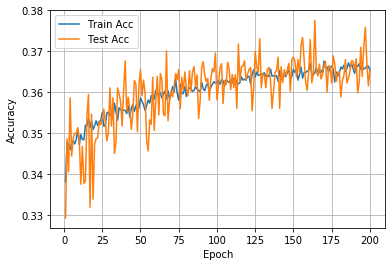

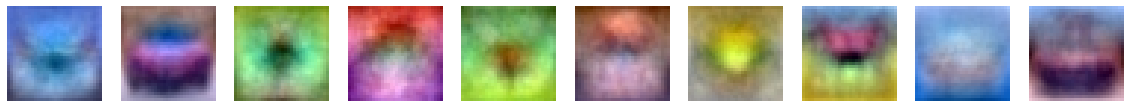

In [0]:
from keras import regularizers
model_reg = keras.models.Sequential()
model_reg.add(keras.layers.Dense(units=y_train.shape[1],kernel_regularizer=regularizers.l2(0.1),activation='softmax',use_bias=True))
sgd=keras.optimizers.SGD(lr=0.1, decay=0.00004)
model_reg.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
epochs = 200
model2=model_reg.fit(X_train.reshape(-1,32*32*3), y_train, validation_data=(X_test.reshape(-1,32*32*3), y_test), epochs=epochs, batch_size=128)

plt.figure()
plt.plot(range(1,len(model2.history['acc'])+1),model2.history['acc'], label='Train Acc')
plt.plot(range(1,len(model2.history['acc'])+1),model2.history['val_acc'], label='Test Acc')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.grid()
plt.show()

num_classes=y_train.shape[1]
fig, ax_arr = plt.subplots(1,num_classes)
W = model_reg.layers[0].get_weights()[0]  #get the weights of layer 0. get_weights()[1] is the bias
for idx in range(num_classes):
  W_i = W[:,idx]
  # normalize
  W_i = W_i - np.mean(W_i)
  # move to [0,1]
  W_i = (W_i - np.min(W_i))/(np.max(W_i)- np.min(W_i))
  # reshape to RGB shape
  W_i = W_i.reshape(32,32,3)
  ax_arr[idx].imshow(W_i)
  ax_arr[idx].axis('off')
fig.set_size_inches(20,20)
plt.show()

using CNN:

In [0]:
# Using convolutions

model = keras.models.Sequential()
# conv + pooling

model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3),padding='same'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.Dropout(0.25))

# addition
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(keras.layers.AveragePooling2D())
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(units=120, activation='relu',use_bias=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(units=64, activation='relu',use_bias=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(units=10, activation = 'softmax',use_bias=True))

epochs = 100
lrate = 0.01
decay = lrate/epochs
sgd=keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=0.00004)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model3=model.fit(X_train.reshape(-1,32,32,3), y_train, validation_data=(X_test.reshape(-1,32,32,3), y_test), epochs=epochs, batch_size=64)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 263us/step - loss: 2.0416 - acc: 0.2382 - val_loss: 1.7312 - val_acc: 0.3600
Epoch 2/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.7052 - acc: 0.3717 - val_loss: 1.5249 - val_acc: 0.4359
Epoch 3/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.5247 - acc: 0.4431 - val_loss: 1.3648 - val_acc: 0.5016
Epoch 4/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.4032 - acc: 0.4907 - val_loss: 1.2195 - val_acc: 0.5569
Epoch 5/100
50000/50000 [==============================] - 7s 142us/step - loss: 1.3119 - acc: 0.5266 - val_loss: 1.1484 - val_acc: 0.5892
Epoch 6/100
50000/50000 [==============================] - 7s 142us/step - loss: 1.2339 - acc: 0.5619 - val_loss: 1.1041 - val_acc: 0.609

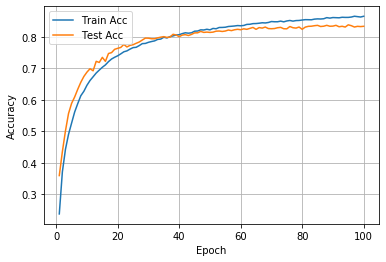

In [0]:
plt.figure()
plt.plot(range(1,len(model3.history['acc'])+1),model3.history['acc'], label='Train Acc')
plt.plot(range(1,len(model3.history['acc'])+1),model3.history['val_acc'], label='Test Acc')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.grid()
plt.show()

In [0]:
from PIL import Image
from google.colab import files
uploaded = files.upload()


Saving car1.jpg to car1.jpg
Saving ship1.jpg to ship1.jpg


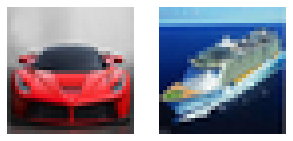

classifiy as 1 real label is 1
classifiy as 8 real label is 8
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [0]:
import numpy as np
from io import BytesIO
im1 = Image.open(BytesIO(uploaded['car1.jpg']))
im2 = Image.open(BytesIO(uploaded['ship1.jpg']))
im1 = im1.resize((32,32), resample=Image.LANCZOS)
im2 = im2.resize((32,32), resample=Image.LANCZOS)
im1 = np.array(im1)
im2 = np.array(im2)
test = np.array([im1,im2])
res=model.predict(test)
probs = model.predict_proba(test)
num_classes=y_train.shape[1]
fig, ax_arr = plt.subplots(1,2)
for idx in range(2):
  ax_arr[idx].imshow(test[idx])
  ax_arr[idx].axis('off')
fig.set_size_inches(5,5)
plt.show()


print("classifiy as "+np.str(np.argmax(res[0]))+" real label is 1")
print("classifiy as "+np.str(np.argmax(res[1]))+" real label is 8")

print(probs[0])
print(probs[1])
